In [1]:
from json import load, dump
from add_fields_functions import *
import matplotlib.pyplot as plt

In [2]:
with open("../full_data.json", "r") as f:
    dataset = load(f)

In [3]:
dataset.keys()

dict_keys(['CU000', 'CU001', 'CU002', 'CU003', 'CU004', 'CU005', 'CU006', 'CU007', 'CU008', 'CU009', 'CU010', 'CU011'])

In [4]:
advanced_state = {}


for checkup_name in dataset.keys():
	advanced_state[checkup_name] = []
	currents = np.vectorize(lambda x : relaxed_sign(x, 0.2))(derivative(dataset[checkup_name]["I"], 5))
	tensions = np.vectorize(lambda x : relaxed_sign(x, 0.2))(derivative(dataset[checkup_name]["U"], 5))

	print(f"{checkup_name} {'OK' if len(currents) == len(tensions) else 'NOT OK'}")
	
	for current, tension, state in zip(currents, tensions, dataset[checkup_name]["Command"]):
		if state == "Pause":
			cur = "REST"
		elif state == "Charge":
			if current == 0:
				cur = "CHARGE_CC"
			elif tension == 0:
				cur = "CHARGE_CV"
			else:
				cur = "CHARGE_DYNAMIC"
		else:  # discharging
			if current == 0:
				cur = "DISCHARGE_CC"
			elif tension == 0:
				cur = "DISCHARGE_CV"
			else:
				cur = "DISCHARGE_DYNAMIC"
		
		advanced_state[checkup_name].append(cur)


CU000 OK
CU001 OK
CU002 OK
CU003 OK
CU004 OK
CU005 OK
CU006 OK
CU007 OK
CU008 OK
CU009 OK
CU010 OK
CU011 OK


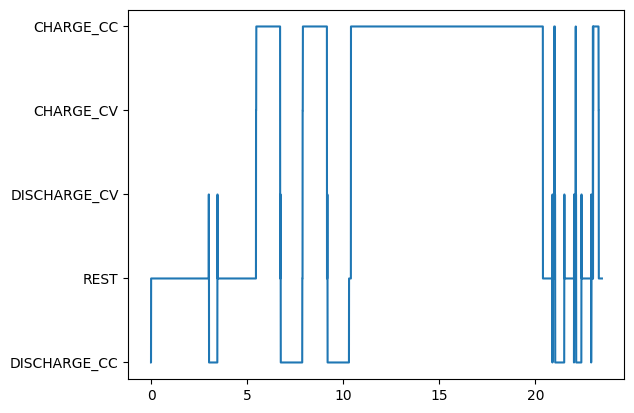

In [5]:
plt.plot(dataset["CU000"]["Time"], advanced_state["CU000"])

In [6]:
with open("advanced_state.json", "w") as f:
	dump(advanced_state, f)

In [7]:
continuous = {}

for checkup_name in advanced_state:
    continuous[checkup_name] = {"time_periods": [dataset[checkup_name]["Time"][0]],
                                "labels": [advanced_state[checkup_name][0]]}
    for i, time in enumerate(dataset[checkup_name]["Time"]):
        name = advanced_state[checkup_name][i]
        if name == continuous[checkup_name]["labels"][-1]:
            continuous[checkup_name]["time_periods"][-1] = time
        else:
            continuous[checkup_name]["time_periods"].append(time)
            continuous[checkup_name]["labels"].append(name)

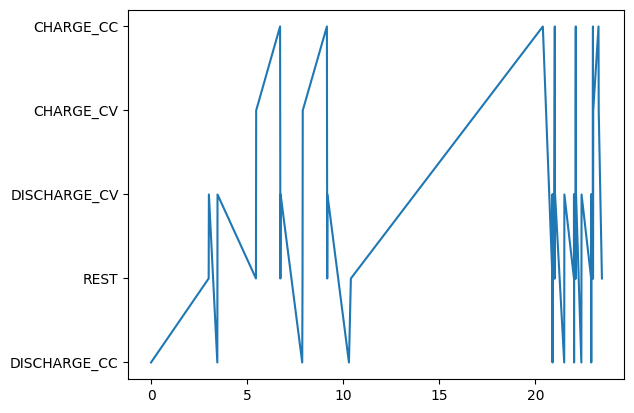

In [8]:
plt.plot(continuous["CU000"]["time_periods"], continuous["CU000"]["labels"])

In [9]:
with open("continuous_advanced_state.json", "w") as f:
	dump(continuous, f)